## Домашнее задание №3

В данном задании вам необходимо реализовать функции ошибки для линейной регрессии и их производные по параметрам, __не используя автоматические дифференцирование.__ Все методы должны быть реализованы только с использованием библиотеки `numpy`. 

Ваша основная задача: вывести формулы для производных __MSE, MAE, L1 и L2 регуляризационных членов__ в _векторном случае_ (т.е. когда и объект $\mathbf{x}_i$, и целевое значение $\mathbf{y}_i$ являются векторами.


Для работы вновь обратимся к [Boston housing prices dataset](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_boston.html). Он был предобработан для вашего удобства и будет загружен ниже.

In [2]:
'''
If you are using Google Colab, uncomment the next line to download `boston_subset.json`
'''
# !wget https://raw.githubusercontent.com/girafe-ai/ml-course/msu_branch/homeworks/hw02_derivatives/boston_subset.json

'\nIf you are using Google Colab, uncomment the next line to download `boston_subset.json`\n'

In [3]:
# Run some setup code for this notebook.
import random
import numpy as np
import matplotlib.pyplot as plt

In [4]:
import json
with open('boston_subset.json', 'r') as iofile:
    dataset = json.load(iofile)
feature_matrix = np.array(dataset['data'])
targets = np.array(dataset['target'])

## Имплементация функций потерь и методов регуляризации.
Для того, чтобы решить задание, вам необходимо реализовать все методы в файле `loss_and_derivatives.py`.
__Внимание, в данном задании не требуется использовать свободный член (bias term)__, т.е. линейная модель примет простой вид
$$
\hat{\mathbf{y}} = XW
$$
Единичный столбец также не добавляется к матрице $X$.

Реализуйте методы для MSE, MAE, L1 и L2 регуляризации, а также вычисления их производных (опциональное задание) по параметрам линейной модели.

__Для вашего удобства данные уже предобработаны, и использование линейной модели без свободного члена не является ошибкой. В данном задании он не должен быть использован.__

In [133]:
import numpy as np


class LossAndDerivatives:
    @staticmethod
    def mse(X, Y, w):
        """
        X : numpy array of shape (`n_observations`, `n_features`)
        Y : numpy array of shape (`n_observations`, `target_dimentionality`) or (`n_observations`,)
        w : numpy array of shape (`n_features`, `target_dimentionality`) or (`n_features`,)

        Return : float
            single number with MSE value of linear model (X.dot(w)) with no bias term
            on the selected dataset.
        
        Comment: If Y is two-dimentional, average the error over both dimentions.
        """
        print(f"X: {X}")
        print(f"w: {w}")
        print(f"X.dot(w): {X.dot(w)}")
        return np.mean((X.dot(w) - Y)**2)

    @staticmethod
    def mae(X, Y, w):
        """
        X : numpy array of shape (`n_observations`, `n_features`)
        Y : numpy array of shape (`n_observations`, `target_dimentionality`) or (`n_observations`,)
        w : numpy array of shape (`n_features`, `target_dimentionality`) or (`n_features`,)
                
        Return: float
            single number with MAE value of linear model (X.dot(w)) with no bias term
            on the selected dataset.

        Comment: If Y is two-dimentional, average the error over both dimentions.
        """

        return np.mean(np.abs(X.dot(w) - Y)) 

    @staticmethod
    def l2_reg(w):
        """
        w : numpy array of shape (`n_features`, `target_dimentionality`) or (`n_features`,)

        Return: float
            single number with sum of squared elements of the weight matrix ( \sum_{ij} w_{ij}^2 )

        Computes the L2 regularization term for the weight matrix w.
        """
        
        return np.sum(np.square(w))

    @staticmethod
    def l1_reg(w):
        """
        w : numpy array of shape (`n_features`, `target_dimentionality`)

        Return : float
            single number with sum of the absolute values of the weight matrix ( \sum_{ij} |w_{ij}| )
        
        Computes the L1 regularization term for the weight matrix w.
        """

        
        return np.sum(np.abs(w))

    @staticmethod
    def no_reg(w):
        """
        Simply ignores the regularization
        """
        return 0.
    
    @staticmethod
    def mse_derivative(X, Y, w):
        """
        X : numpy array of shape (`n_observations`, `n_features`)
        Y : numpy array of shape (`n_observations`, `target_dimentionality`) or (`n_observations`,)
        w : numpy array of shape (`n_features`, `target_dimentionality`) or (`n_features`,)
        
        Return : numpy array of same shape as `w`

        Computes the MSE derivative for linear regression (X.dot(w)) with no bias term
        w.r.t. w weight matrix.
        
        Please mention, that in case `target_dimentionality` > 1 the error is averaged along this
        dimension as well, so you need to consider that fact in derivative implementation.
        """
        

        return -2*X.T.dot(Y - X.dot(w))/((Y - X.dot(w)).size)

    @staticmethod
    def mae_derivative(X, Y, w):
        """
        X : numpy array of shape (`n_observations`, `n_features`)
        Y : numpy array of shape (`n_observations`, `target_dimentionality`) or (`n_observations`,)
        w : numpy array of shape (`n_features`, `target_dimentionality`) or (`n_features`,)
        
        Return : numpy array of same shape as `w`

        Computes the MAE derivative for linear regression (X.dot(w)) with no bias term
        w.r.t. w weight matrix.
        
        Please mention, that in case `target_dimentionality` > 1 the error is averaged along this
        dimension as well, so you need to consider that fact in derivative implementation.
        """

        sign = np.sign(X.dot(w) - Y)
        return X.T.dot(sign)/(sign.size)

    @staticmethod
    def l2_reg_derivative(w):
        """
        w : numpy array of shape (`n_features`, `target_dimentionality`) or (`n_features`,)

        Return : numpy array of same shape as `w`

        Computes the L2 regularization term derivative w.r.t. the weight matrix w.
        """

        return 2*w

    @staticmethod
    def l1_reg_derivative(w):
        """
        Y : numpy array of shape (`n_observations`, `target_dimentionality`) or (`n_observations`,)
        w : numpy array of shape (`n_features`, `target_dimentionality`) or (`n_features`,)

        Return : numpy array of same shape as `w`

        Computes the L1 regularization term derivative w.r.t. the weight matrix w.
        """

        return np.sign(w)

    @staticmethod
    def no_reg_derivative(w):
        """
        Simply ignores the derivative
        """
        return np.zeros_like(w)



Обращаем ваше внимание, требуется реализовать решение в векторном виде (т.е. для каждого объекта предсказание $\hat{\mathbf{y}}$ является вектором с размерностью $\geq 1$. При подсчете ошибки она усредняется как по объектам, так и по размерности __y__.

Например, для вектора ошибок на одном объекте $[1., 1., 1., 1.]$ значение функции ошибки будет равно $\frac{1}{4}(1. + 1. + 1. + 1.)$ 

Для вашего удобства метод `.mse` уже реализован и вы можете обращаться к нему за примером.

Для проверки своего кода вам доступно несколько assert'ов:

In [134]:
w = np.array([1., 1.])
x_n, y_n = feature_matrix, targets

# Repeating data to make everything multi-dimentional
w = np.vstack([w[None, :] + 0.27, w[None, :] + 0.22, w[None, :] + 0.45, w[None, :] + 0.1]).T
y_n = np.hstack([y_n[:, None], 2*y_n[:, None], 3*y_n[:, None], 4*y_n[:, None]])

In [135]:
reference_mse_derivative = np.array([
    [ 7.32890068, 12.88731311, 18.82128365, 23.97731238],
    [ 9.55674399, 17.05397661, 24.98807528, 32.01723714]
])
reference_l2_reg_derivative = np.array([
    [2.54, 2.44, 2.9 , 2.2 ],
    [2.54, 2.44, 2.9 , 2.2 ]
])



assert np.allclose(
    reference_mse_derivative,
    LossAndDerivatives.mse_derivative(x_n, y_n, w), rtol=1e-3
), 'Something wrong with MSE derivative'

assert np.allclose(
    reference_l2_reg_derivative,
    LossAndDerivatives.l2_reg_derivative(w), rtol=1e-3
), 'Something wrong with L2 reg derivative'

print(
    'MSE derivative:\n{} \n\nL2 reg derivative:\n{}'.format(
        LossAndDerivatives.mse_derivative(x_n, y_n, w),
        LossAndDerivatives.l2_reg_derivative(w))
)

MSE derivative:
[[ 7.32890068 12.88731311 18.82128365 23.97731238]
 [ 9.55674399 17.05397661 24.98807528 32.01723714]] 

L2 reg derivative:
[[2.54 2.44 2.9  2.2 ]
 [2.54 2.44 2.9  2.2 ]]


In [136]:
reference_mae_derivative = np.array([
    [0.19708867, 0.19621798, 0.19621798, 0.19572906],
    [0.25574138, 0.25524507, 0.25524507, 0.25406404]
])
reference_l1_reg_derivative = np.array([
    [1., 1., 1., 1.],
    [1., 1., 1., 1.]
])

# LossAndDerivatives.mae_derivative(x_n, y_n, w)

assert np.allclose(
    reference_mae_derivative,
    LossAndDerivatives.mae_derivative(x_n, y_n, w), rtol=1e-3
), 'Something wrong with MAE derivative'

assert np.allclose(
    reference_l1_reg_derivative,
    LossAndDerivatives.l1_reg_derivative(w), rtol=1e-3
), 'Something wrong with L1 reg derivative'

print(
    'MAE derivative:\n{} \n\nL1 reg derivative:\n{}'.format(
        LossAndDerivatives.mae_derivative(x_n, y_n, w),
        LossAndDerivatives.l1_reg_derivative(w))
)

MAE derivative:
[[0.19708867 0.19621798 0.19621798 0.19572906]
 [0.25574138 0.25524507 0.25524507 0.25406404]] 

L1 reg derivative:
[[1. 1. 1. 1.]
 [1. 1. 1. 1.]]


### Градиентный спуск для решения реальной задачи
Следующая функция позволяет найти оптимальные значения параметров с помощью градиентного спуска:

In [137]:
def get_w_by_grad(X, Y, w_0, loss_mode='mse', reg_mode=None, lr=0.05, n_steps=100, reg_coeff=0.05):
    if loss_mode == 'mse':
        loss_function = LossAndDerivatives.mse
        loss_derivative = LossAndDerivatives.mse_derivative
    elif loss_mode == 'mae':
        loss_function = LossAndDerivatives.mae
        loss_derivative = LossAndDerivatives.mae_derivative
    else:
        raise ValueError('Unknown loss function. Available loss functions: `mse`, `mae`')
    
    if reg_mode is None:
        reg_function = LossAndDerivatives.no_reg
        reg_derivative = LossAndDerivatives.no_reg_derivative # lambda w: np.zeros_like(w)
    elif reg_mode == 'l2':
        reg_function = LossAndDerivatives.l2_reg
        reg_derivative = LossAndDerivatives.l2_reg_derivative
    elif reg_mode == 'l1':
        reg_function = LossAndDerivatives.l1_reg
        reg_derivative = LossAndDerivatives.l1_reg_derivative
    else:
        raise ValueError('Unknown regularization mode. Available modes: `l1`, `l2`, None')
    
    
    w = w_0.copy()

    for i in range(n_steps):
        empirical_risk = loss_function(X, Y, w) + reg_coeff * reg_function(w)
        gradient = loss_derivative(X, Y, w) + reg_coeff * reg_derivative(w)
        gradient_norm = np.linalg.norm(gradient)
        if gradient_norm > 5.:
            gradient = gradient / gradient_norm * 5.
        w -= lr * gradient
        
        if i % 25 == 0:
            print('Step={}, loss={},\ngradient values={}\n'.format(i, empirical_risk, gradient))
    return w


Рассмотрим простой пример:

In [138]:
# Initial weight matrix
w = np.ones((2,1), dtype=float)
y_n = targets[:, None] 

In [139]:
w_grad = get_w_by_grad(x_n, y_n, w, loss_mode='mse', reg_mode='l2', n_steps=250)

X: [[0.231 0.498]
 [0.707 0.914]
 [0.707 0.403]
 [0.218 0.294]
 [0.218 0.533]
 [0.218 0.521]
 [0.787 1.243]
 [0.787 1.915]
 [0.787 2.993]
 [0.787 1.71 ]
 [0.787 2.045]
 [0.787 1.327]
 [0.787 1.571]
 [0.814 0.826]
 [0.814 1.026]
 [0.814 0.847]
 [0.814 0.658]
 [0.814 1.467]
 [0.814 1.169]
 [0.814 1.128]
 [0.814 2.102]
 [0.814 1.383]
 [0.814 1.872]
 [0.814 1.988]
 [0.814 1.63 ]
 [0.814 1.651]
 [0.814 1.481]
 [0.814 1.728]
 [0.814 1.28 ]
 [0.814 1.198]
 [0.814 2.26 ]
 [0.814 1.304]
 [0.814 2.771]
 [0.814 1.835]
 [0.814 2.034]
 [0.596 0.968]
 [0.596 1.141]
 [0.596 0.877]
 [0.596 1.013]
 [0.295 0.432]
 [0.295 0.198]
 [0.691 0.484]
 [0.691 0.581]
 [0.691 0.744]
 [0.691 0.955]
 [0.691 1.021]
 [0.691 1.415]
 [0.691 1.88 ]
 [0.691 3.081]
 [0.691 1.62 ]
 [0.564 1.345]
 [0.564 0.943]
 [0.564 0.528]
 [0.564 0.843]
 [0.4   1.48 ]
 [0.122 0.481]
 [0.074 0.577]
 [0.132 0.395]
 [0.513 0.686]
 [0.513 0.922]
 [0.513 1.315]
 [0.513 1.444]
 [0.513 0.673]
 [0.513 0.95 ]
 [0.138 0.805]
 [0.337 0.467]
 [0.337

X: [[0.231 0.498]
 [0.707 0.914]
 [0.707 0.403]
 [0.218 0.294]
 [0.218 0.533]
 [0.218 0.521]
 [0.787 1.243]
 [0.787 1.915]
 [0.787 2.993]
 [0.787 1.71 ]
 [0.787 2.045]
 [0.787 1.327]
 [0.787 1.571]
 [0.814 0.826]
 [0.814 1.026]
 [0.814 0.847]
 [0.814 0.658]
 [0.814 1.467]
 [0.814 1.169]
 [0.814 1.128]
 [0.814 2.102]
 [0.814 1.383]
 [0.814 1.872]
 [0.814 1.988]
 [0.814 1.63 ]
 [0.814 1.651]
 [0.814 1.481]
 [0.814 1.728]
 [0.814 1.28 ]
 [0.814 1.198]
 [0.814 2.26 ]
 [0.814 1.304]
 [0.814 2.771]
 [0.814 1.835]
 [0.814 2.034]
 [0.596 0.968]
 [0.596 1.141]
 [0.596 0.877]
 [0.596 1.013]
 [0.295 0.432]
 [0.295 0.198]
 [0.691 0.484]
 [0.691 0.581]
 [0.691 0.744]
 [0.691 0.955]
 [0.691 1.021]
 [0.691 1.415]
 [0.691 1.88 ]
 [0.691 3.081]
 [0.691 1.62 ]
 [0.564 1.345]
 [0.564 0.943]
 [0.564 0.528]
 [0.564 0.843]
 [0.4   1.48 ]
 [0.122 0.481]
 [0.074 0.577]
 [0.132 0.395]
 [0.513 0.686]
 [0.513 0.922]
 [0.513 1.315]
 [0.513 1.444]
 [0.513 0.673]
 [0.513 0.95 ]
 [0.138 0.805]
 [0.337 0.467]
 [0.337

X: [[0.231 0.498]
 [0.707 0.914]
 [0.707 0.403]
 [0.218 0.294]
 [0.218 0.533]
 [0.218 0.521]
 [0.787 1.243]
 [0.787 1.915]
 [0.787 2.993]
 [0.787 1.71 ]
 [0.787 2.045]
 [0.787 1.327]
 [0.787 1.571]
 [0.814 0.826]
 [0.814 1.026]
 [0.814 0.847]
 [0.814 0.658]
 [0.814 1.467]
 [0.814 1.169]
 [0.814 1.128]
 [0.814 2.102]
 [0.814 1.383]
 [0.814 1.872]
 [0.814 1.988]
 [0.814 1.63 ]
 [0.814 1.651]
 [0.814 1.481]
 [0.814 1.728]
 [0.814 1.28 ]
 [0.814 1.198]
 [0.814 2.26 ]
 [0.814 1.304]
 [0.814 2.771]
 [0.814 1.835]
 [0.814 2.034]
 [0.596 0.968]
 [0.596 1.141]
 [0.596 0.877]
 [0.596 1.013]
 [0.295 0.432]
 [0.295 0.198]
 [0.691 0.484]
 [0.691 0.581]
 [0.691 0.744]
 [0.691 0.955]
 [0.691 1.021]
 [0.691 1.415]
 [0.691 1.88 ]
 [0.691 3.081]
 [0.691 1.62 ]
 [0.564 1.345]
 [0.564 0.943]
 [0.564 0.528]
 [0.564 0.843]
 [0.4   1.48 ]
 [0.122 0.481]
 [0.074 0.577]
 [0.132 0.395]
 [0.513 0.686]
 [0.513 0.922]
 [0.513 1.315]
 [0.513 1.444]
 [0.513 0.673]
 [0.513 0.95 ]
 [0.138 0.805]
 [0.337 0.467]
 [0.337

X: [[0.231 0.498]
 [0.707 0.914]
 [0.707 0.403]
 [0.218 0.294]
 [0.218 0.533]
 [0.218 0.521]
 [0.787 1.243]
 [0.787 1.915]
 [0.787 2.993]
 [0.787 1.71 ]
 [0.787 2.045]
 [0.787 1.327]
 [0.787 1.571]
 [0.814 0.826]
 [0.814 1.026]
 [0.814 0.847]
 [0.814 0.658]
 [0.814 1.467]
 [0.814 1.169]
 [0.814 1.128]
 [0.814 2.102]
 [0.814 1.383]
 [0.814 1.872]
 [0.814 1.988]
 [0.814 1.63 ]
 [0.814 1.651]
 [0.814 1.481]
 [0.814 1.728]
 [0.814 1.28 ]
 [0.814 1.198]
 [0.814 2.26 ]
 [0.814 1.304]
 [0.814 2.771]
 [0.814 1.835]
 [0.814 2.034]
 [0.596 0.968]
 [0.596 1.141]
 [0.596 0.877]
 [0.596 1.013]
 [0.295 0.432]
 [0.295 0.198]
 [0.691 0.484]
 [0.691 0.581]
 [0.691 0.744]
 [0.691 0.955]
 [0.691 1.021]
 [0.691 1.415]
 [0.691 1.88 ]
 [0.691 3.081]
 [0.691 1.62 ]
 [0.564 1.345]
 [0.564 0.943]
 [0.564 0.528]
 [0.564 0.843]
 [0.4   1.48 ]
 [0.122 0.481]
 [0.074 0.577]
 [0.132 0.395]
 [0.513 0.686]
 [0.513 0.922]
 [0.513 1.315]
 [0.513 1.444]
 [0.513 0.673]
 [0.513 0.95 ]
 [0.138 0.805]
 [0.337 0.467]
 [0.337

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



### Сравнение с `sklearn`
Сравним реализованную модель с версией из `sklearn`:

In [140]:
from sklearn.linear_model import Ridge

In [141]:
lr = Ridge(alpha=0.05)
lr.fit(x_n, y_n)
print('sklearn linear regression implementation delivers MSE = {}'.format(np.mean((lr.predict(x_n) - y_n)**2)))

sklearn linear regression implementation delivers MSE = 42.53541245128315


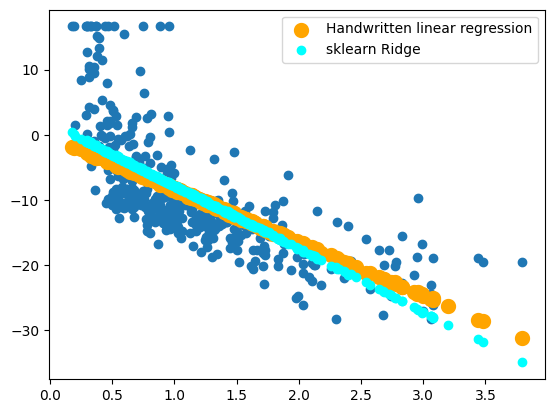

In [142]:
plt.scatter(x_n[:, -1], y_n[:, -1])
plt.scatter(x_n[:, -1], x_n.dot(w_grad)[:, -1], color='orange', label='Handwritten linear regression', linewidth=5)
plt.scatter(x_n[:, -1], lr.predict(x_n), color='cyan', label='sklearn Ridge')
plt.legend()
plt.show()

Если в полученных решениях есть небольшие различия, это не страшно. Модель основанная на вашей реализации не использует свободный член (он равен $0$), в то время версия из `sklearn` настраивает и его.

### Сдача задания
Сдайте в чекер реализованный класс `LossAndDerivatives`. Для этого можете скопировать всю ячейку с кодом (в том числе и импортирование `numpy`) в файл `derivatives.py`.

На этом задание завершено. Поздравляем!